In [18]:
import numpy as np
import requests
import pandas as pd
import sys
import matplotlib.pyplot as plt
import datetime


%matplotlib inline

In [19]:
#Useful functions

#df_col_astype_int: Intakes the dataframe and corrects the types of the values in each column 
def df_col_astype_int(df,col_names,col_names_float):
    '''Inputs:
            df: A pandas Dataframe.
            col_names: Names of the columns in df.
            col_names_float: Names of the columns that instead of having to be integers need to be floats.
            
        Outputs:
            df but with the correct columns changed to integers and floats'''
    
    for name in col_names:
        if name not in col_names_float:
            df[name] = df[name].astype(int)
        elif name in col_names_float:
            df[name] = df[name].astype(float)
        else:
            print("Error: Unaccounted for name in col_names list. Revise these lists")
            sys.exit()
    return df

#chunks splits column_name list into chunks of size n
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]
        
#delete_nan_rows retrns df with rows containing non-Nan values        
def delete_nan_rows(df):
    """Returns df with rows containing non-NaN values"""
    for name in df.columns:
        df = df[np.isfinite(df[name])]
    return df

#isgreaterthan returns df with column values >= a specified value (e.g 0) unless stated otherwise
def isgreaterthan(df,value,col_names_ltv):
    """Returns df with rows contained features greater or equal to
        value (except from those excluded in col_names_ltv)"""
    for name in df.columns:
        if name not in col_names_ltv:
            df = df[df[name]>=value]
    return df

In [20]:
#Load all the player history data from Fantasy Premier League (FPL)

#fpl_data = requests.get('https://fantasy.premierleague.com/drf/bootstrap-static').json()  #old
fpl_data = requests.get('https://fantasy.premierleague.com/api/bootstrap-static/').json()  #new

for i, player in enumerate(fpl_data['elements']):
    fpl_data['elements'][i]['history'] = requests.get('https://fantasy.premierleague.com/api/element-summary/' + str(player['id']) + '/').json()

In [48]:
#Points threshold
threshold_points = 6

#Position Booleans
goalkeeper = True
defender = False
midfielder = False
forward = False


if goalkeeper == True:
    position = 1
    position_str = 'goalkeeper'
elif defender == True:
    position = 2
    position_str = 'defender'
elif midfielder == True:
    position = 3
    position_str = 'midfielder'
elif forward == True:
    position = 4
    position_str = 'forward'
else:
    print("Error: Invalid position value ")
    sys.exit()
    
#Feature names are specific to whather an individual player is outfield or in goal
#Featue details should be obvious by name but more info can be found at https://fantasy.premierleague.com/help/
#Feature selection under decision after considering correlations between them in the future.
column_names = ['element','GW','minutes','goals_scored','assists','clean_sheets','goals_conceded','own_goals',
                    'penalties_missed','yellow_cards','red_cards','bonus','bps','influence','creativity','threat',
                    'ict_index','value','total_points']
df = pd.DataFrame(columns=column_names)

print('Position tuning complete')

Position tuning complete


In [49]:
#Creating the complete player history dataframe for players of a particular position

for i, player in enumerate(fpl_data['elements']):
    if fpl_data['elements'][i]['element_type'] == position: 
        print('ID: ',fpl_data['elements'][i]['id'], " Name: ",fpl_data['elements'][i]['web_name'])
        for m in range(0,len(fpl_data['elements'][i]['history']['history'])):
            #Variables that we're going to save              
            element = int(fpl_data['elements'][i]['history']['history'][m]['element'])
            GW = int(fpl_data['elements'][i]['history']['history'][m]['round'])
            minutes = int(fpl_data['elements'][i]['history']['history'][m]['minutes'])
            goals_scored = int(fpl_data['elements'][i]['history']['history'][m]['goals_scored'])
            assists = int(fpl_data['elements'][i]['history']['history'][m]['assists'])
            clean_sheets = int(fpl_data['elements'][i]['history']['history'][m]['clean_sheets'])
            goals_conceded = int(fpl_data['elements'][i]['history']['history'][m]['goals_conceded'])
            own_goals = int(fpl_data['elements'][i]['history']['history'][m]['own_goals'])
            penalties_missed = int(fpl_data['elements'][i]['history']['history'][m]['penalties_missed'])
            yellow_cards = int(fpl_data['elements'][i]['history']['history'][m]['yellow_cards'])
            red_cards = int(fpl_data['elements'][i]['history']['history'][m]['red_cards'])
            bonus = int(fpl_data['elements'][i]['history']['history'][m]['bonus'])
            bps = int(fpl_data['elements'][i]['history']['history'][m]['bps'])
            influence = float(fpl_data['elements'][i]['history']['history'][m]['influence'])
            creativity = float(fpl_data['elements'][i]['history']['history'][m]['creativity'])
            threat = float(fpl_data['elements'][i]['history']['history'][m]['threat'])
            ict_index = float(fpl_data['elements'][i]['history']['history'][m]['ict_index'])
            value = int(fpl_data['elements'][i]['history']['history'][m]['value'])
            total_points = int(fpl_data['elements'][i]['history']['history'][m]['total_points'])

            #Series for Pandas DF
            series = pd.Series([element,GW,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,
                penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,
                ict_index,value,total_points],index=column_names)
                
            #Adam: 20/21: Urgh
            #So annoying this year as they got rid of all the good stuff :( (like open passes, recoveries, tackles etc)

            df = df.append(series,ignore_index=True)

print(" ")
print("Players full history DataFrame successfully filled!")

ID:  8  Name:  Leno
ID:  527  Name:  Macey
ID:  547  Name:  Rúnarsson
ID:  12  Name:  Martínez
ID:  28  Name:  Heaton
ID:  32  Name:  Steer
ID:  35  Name:  Nyland
ID:  70  Name:  Ryan
ID:  503  Name:  Walton
ID:  528  Name:  Steele
ID:  96  Name:  Pope
ID:  99  Name:  Peacock-Farrell
ID:  101  Name:  Caballero
ID:  112  Name:  Arrizabalaga
ID:  548  Name:  Mendy
ID:  126  Name:  Hennessey
ID:  128  Name:  Guaita
ID:  151  Name:  Lössl
ID:  157  Name:  Pickford
ID:  167  Name:  Virgínia
ID:  171  Name:  Fabri
ID:  183  Name:  Bettinelli
ID:  186  Name:  Rodák
ID:  516  Name:  Areola
ID:  217  Name:  Schmeichel
ID:  223  Name:  Ward
ID:  194  Name:  Casilla
ID:  208  Name:  Miazek
ID:  213  Name:  Meslier
ID:  532  Name:  Caprile
ID:  245  Name:  Adrián
ID:  252  Name:  Alisson
ID:  267  Name:  Bravo
ID:  278  Name:  Ederson
ID:  538  Name:  Steffen
ID:  289  Name:  Romero
ID:  291  Name:  de Gea
ID:  305  Name:  Henderson
ID:  325  Name:  Darlow
ID:  326  Name:  Dubravka
ID:  488  Name:

In [50]:
#Cleaning the Dataframe
col_names_float = ['influence','creativity','threat','ict_index']   #Names of features that require to be of type float
df = df_col_astype_int(df,column_names,col_names_float)  #Changes features in df to correct type (int and floats only) 
df.head()

#Applying threshold to the Dataframe
df.loc[df['total_points']>=threshold_points,'threshold'] = 1   #Creates new column 'threshold' and = 1 if 'total_points' > threshold_points
df.fillna(0,inplace=True)  #Those not = 1 now = 0
df['threshold'] = df['threshold'].astype(int)   #Remembers to change type of series to integer.

print("Threshold set at 'total_points >= '", threshold_points)
print('Threshold column successfully applied to Dataframe.')

pd.options.display.max_columns = None  #Line required to show all columns in df output below
display(df.head())

Threshold set at 'total_points >= ' 6
Threshold column successfully applied to Dataframe.


,element,GW,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_missed,yellow_cards,red_cards,bonus,bps,influence,creativity,threat,ict_index,value,total_points,threshold
0,8,1,90,0,0,1,0,0,0,0,0,1,29,14.0,0.0,0.0,1.4,50,7,1
1,8,2,90,0,0,0,1,0,0,0,0,0,18,18.0,0.0,0.0,1.8,50,2,0
2,8,3,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,50,0,0
3,527,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,0,0
4,527,2,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,40,0,0


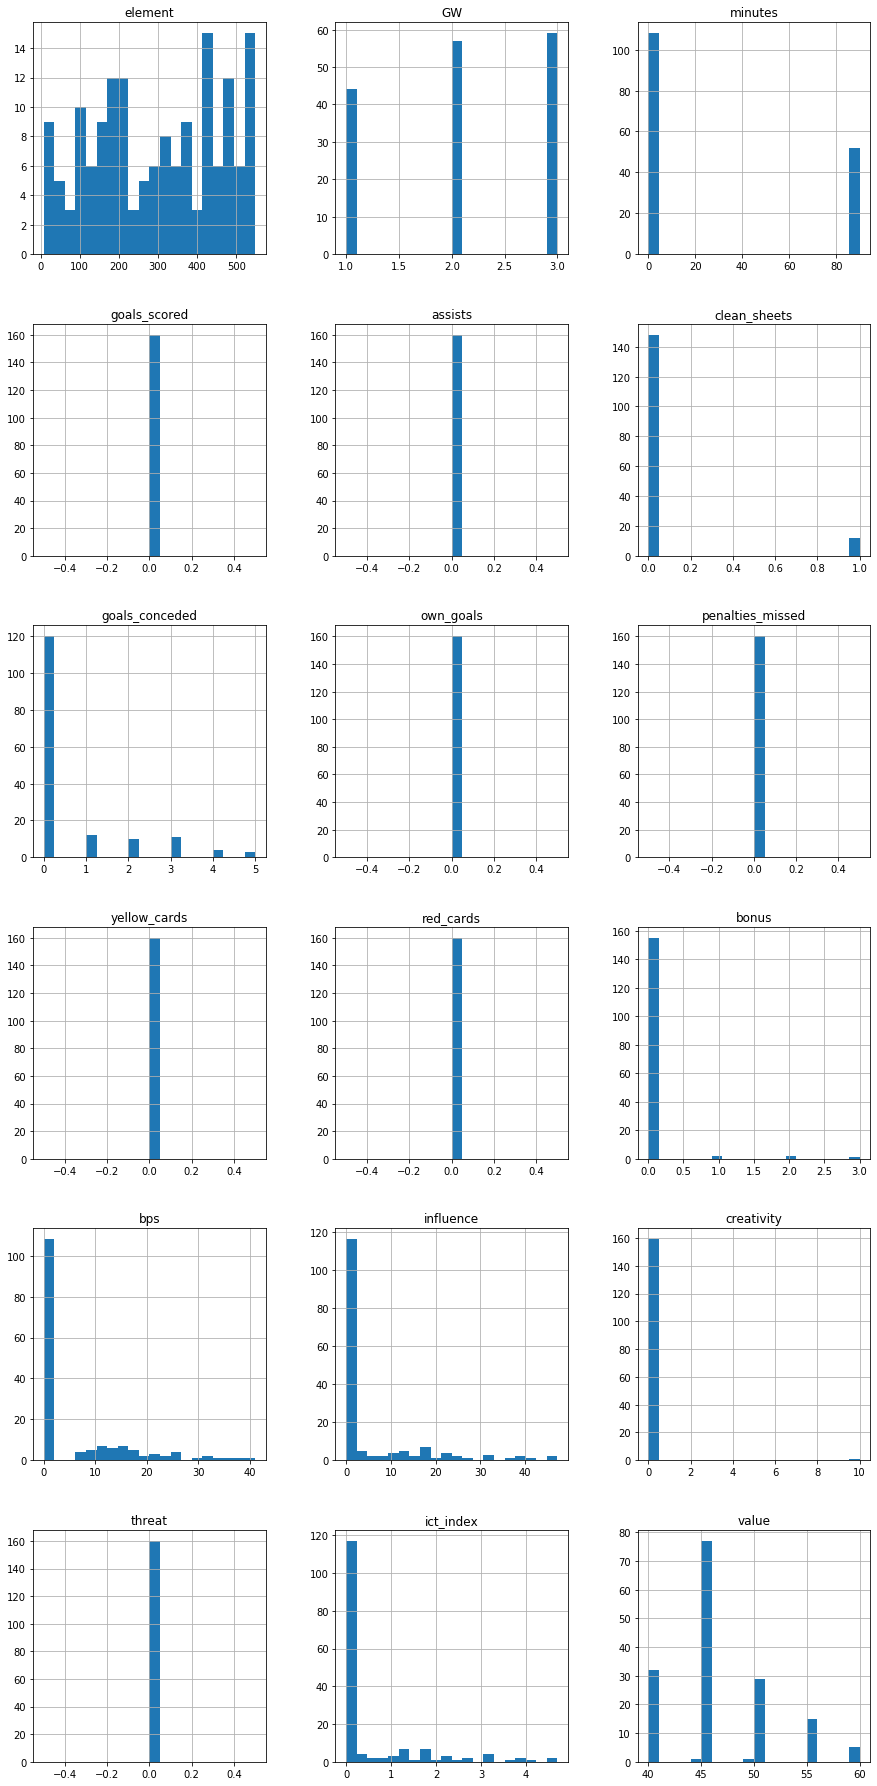

In [51]:
#Good idea to check the properties of each feature to catch anomolies in data.
#FPL data is commerically used in a world-wide game so it is unlikely there will be mistakes
#But still this is good practice and reduces trust in the FPL programmers

#Constraints are usually obvious (e.g 'red_cards' must be integer >= 0 ) but it's good to histogram each
#feature for quick analysis + good 'feel' for each feature which could come in handy later for Machine Learning.

fig, axes = plt.subplots(len(column_names)//3, 3, figsize=(15, 32))  #Creates the canvases for the subplots

i = 0  
for triaxis in axes:
    for axis in triaxis:
        df.hist(column = df.columns[i], bins = 20, ax=axis)   #Histograms the series of the given column
        i = i+1

#Some of these plots we can ignore (e.g element, GW) but the distributions are useful to analyse. 
#Notice how they are all above 0 and mostly integers. BPS is the exception here as this can actually be below 0
#Full explanation of the Bonus POints System (BPS) can be found here: https://www.premierleague.com/news/106533

In [52]:
#Data looks clean but still is good practice to filter out any anomalous points.
#Simple clean out and constrain any points < 0 that shouldn't be and delete any NaN's.

df = delete_nan_rows(df)  #Gets rid of any rows containing NaN's

col_lessthan = 'bps'
df = isgreaterthan(df,0,col_lessthan)  #Makes sure every feature is >= 0 except for bps

#We could also constrain maximum values and could add this later on
#There's no need for one-hot encoding as all feature-like points are all numeric 

#Finally, save the Dataframe in case API crashes/good to keep a copy so far
#There's not too much data so CSV is an okay format
now = datetime.datetime.now()   #Datetime of now for csv name
df.to_csv('data/'+str(position_str)+'/'+str(now.year)+'-'+str(now.month)+'-'+str(now.day)+'.csv')


In [ ]:
#At this stage all of the FPL data from GW 1 to the current GW has been partly cleaned and savedas a csv
#for a particular position. However it is still key to note that a lot of the players record 0 minutes for games
#and that a game is taken as one data point. 

#In this next stage we will further alter the dataset to include the interesting parts and also define 'form' which
#is key for this analysis.